In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_segmentation.csv')


In [3]:
data.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,WebsiteVisits,TimeOnSite,BounceRate,State,Date
0,1,56,Female,3607,11,6,11.28,53.33,Borno,2024-04-12
1,2,69,Male,695,9,19,12.50,40.56,Osun,2024-12-14
2,3,46,Male,3040,9,38,5.19,16.92,Edo,2024-09-27
3,4,32,Male,1949,6,28,12.89,97.75,Delta,2024-04-16
4,5,60,Male,2554,6,2,11.86,85.33,Delta,2024-03-12


In [4]:

# Aggregate data by state
state_data = data.groupby('State').agg({
    'PurchaseAmount': 'mean',
    'WebsiteVisits': 'mean',
    'TimeOnSite': 'mean',
    'BounceRate': 'mean'
}).reset_index()

In [5]:
# Display aggregated data
print(state_data)

          State  PurchaseAmount  WebsiteVisits  TimeOnSite  BounceRate
0          Abia     2580.441860      21.930233   10.466512   48.880930
1         Abuja     2598.019608      24.176471    9.840588   51.794706
2       Anambra     2411.894737      26.070175   10.579474   51.598421
3         Benue     2498.490196      25.941176    8.999020   53.082157
4         Borno     2856.524590      26.852459    9.667541   53.183279
5   Cross River     2187.217391      22.478261    8.596304   45.588043
6         Delta     2557.932203      24.322034   11.318983   50.922034
7           Edo     2785.418605      25.627907    9.691628   56.315349
8         Ekiti     2405.680000      24.760000   10.430800   49.224600
9         Enugu     2502.867925      27.132075   10.943396   49.732264
10          Imo     2777.320755      24.660377    9.696792   53.324906
11       Kaduna     2378.577778      26.977778   10.442889   48.644667
12         Kano     2758.055556      24.361111   11.355833   46.141667
13    

In [6]:
state_data.head()

,State,PurchaseAmount,WebsiteVisits,TimeOnSite,BounceRate
0,Abia,2580.441860,21.930233,10.466512,48.880930
1,Abuja,2598.019608,24.176471,9.840588,51.794706
2,Anambra,2411.894737,26.070175,10.579474,51.598421
3,Benue,2498.490196,25.941176,8.999020,53.082157
4,Borno,2856.524590,26.852459,9.667541,53.183279


In [7]:
data['State'].unique()

array(['Borno', 'Osun', 'Edo', 'Delta', 'Abuja', 'Ekiti', 'Rivers',
       'Benue', 'Anambra', 'Cross River', 'Ondo', 'Lagos', 'Imo',
       'Kaduna', 'Ogun', 'Kogi', 'Abia', 'Kano', 'Enugu', 'Oyo'],
      dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_1820\3529750915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_data, x='State', y='PurchaseAmount', palette='viridis')


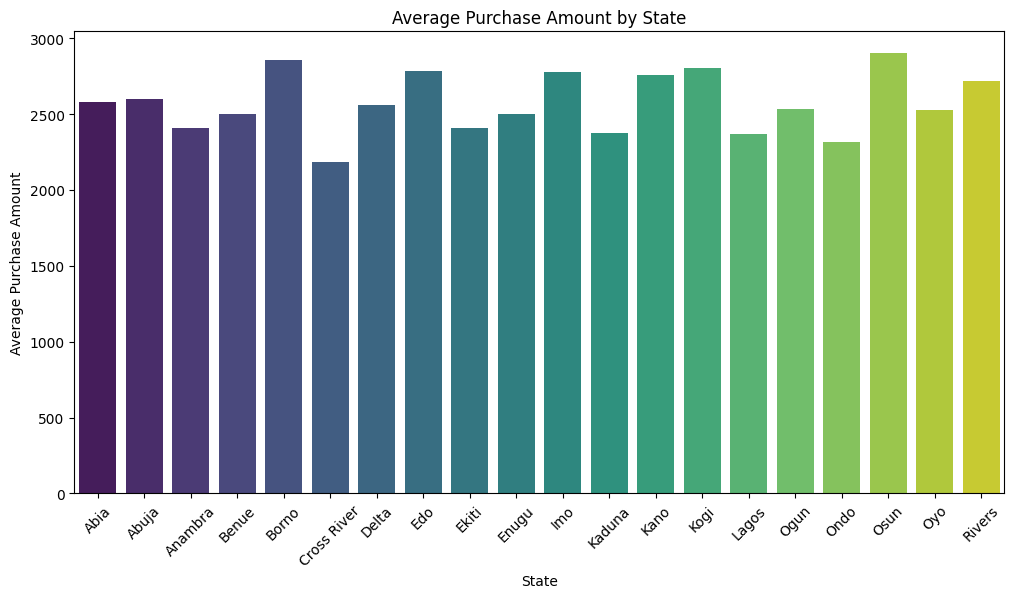

In [8]:
# Visualization 1: Bar Plot of Average Purchase Amount by State
plt.figure(figsize=(12, 6))
sns.barplot(data=state_data, x='State', y='PurchaseAmount', palette='viridis')
plt.title('Average Purchase Amount by State')
plt.xlabel('State')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.savefig('purchase_by_state.png')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1820\973457067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='State', y='TimeOnSite', palette='Set2')


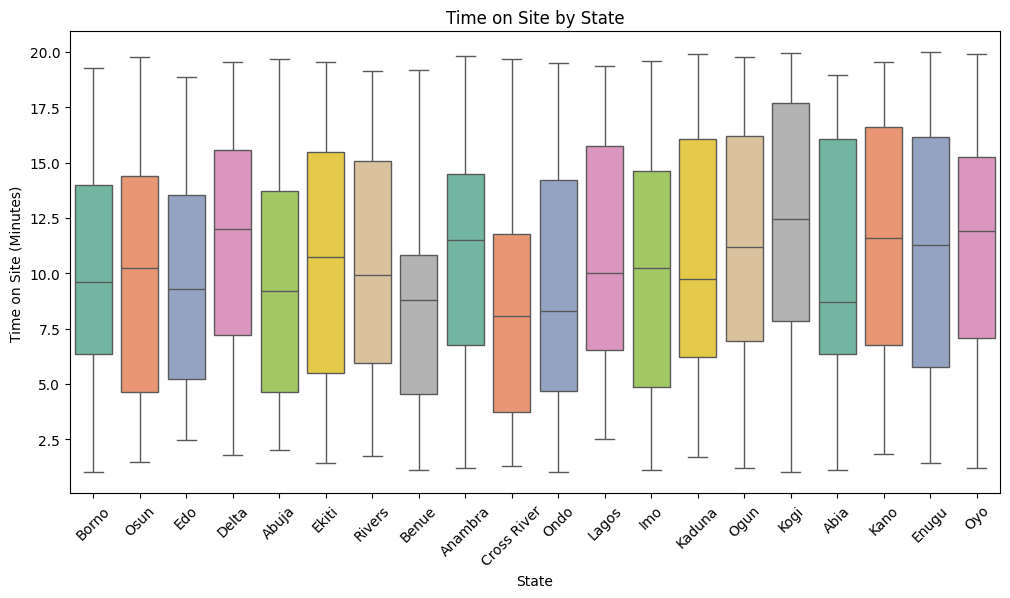

In [9]:

# Visualization 2: Box Plot of TimeOnSite by State
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='State', y='TimeOnSite', palette='Set2')
plt.title('Time on Site by State')
plt.xlabel('State')
plt.ylabel('Time on Site (Minutes)')
plt.xticks(rotation=45)
plt.show()

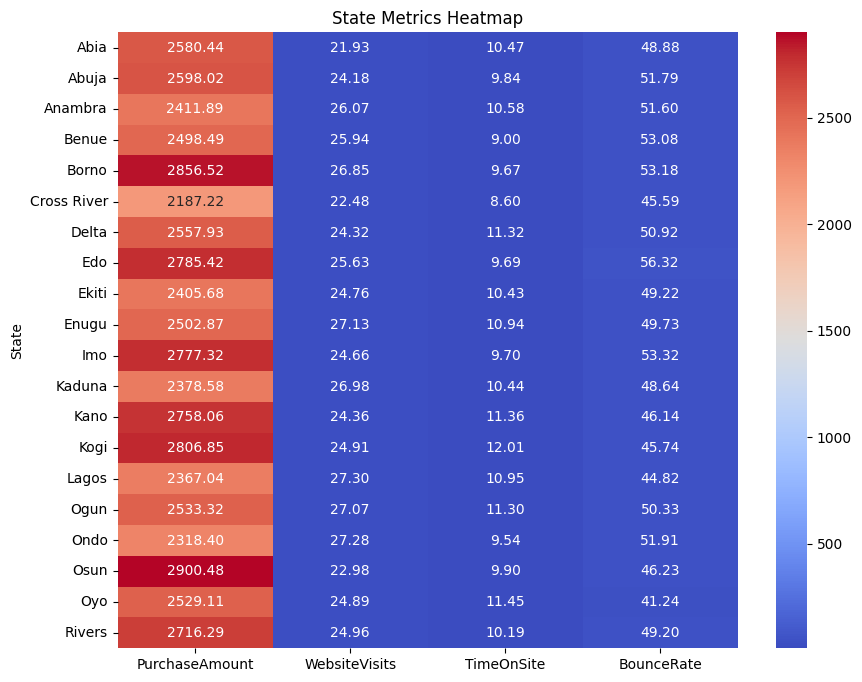

In [10]:

# Visualization 3: Heatmap of State Metrics
heatmap_data = state_data.set_index('State')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('State Metrics Heatmap')
plt.savefig('state_metrics_heatmap.png')
plt.show()

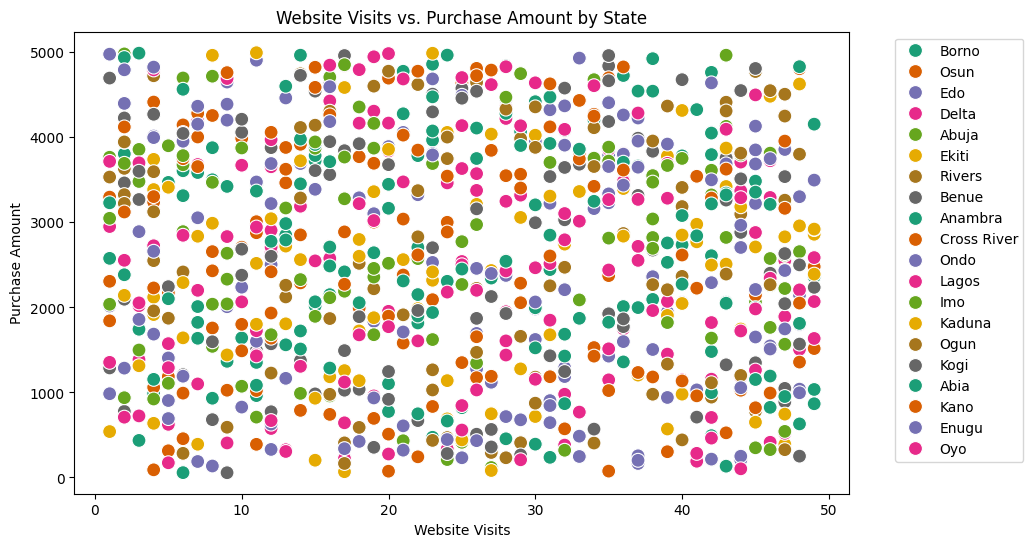

In [11]:
# Visualization 4: Scatter Plot for Website Visits vs. Purchase Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='WebsiteVisits', y='PurchaseAmount', hue='State', palette='Dark2', s=100)
plt.title('Website Visits vs. Purchase Amount by State')
plt.xlabel('Website Visits')
plt.ylabel('Purchase Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
state_data.head()

,State,PurchaseAmount,WebsiteVisits,TimeOnSite,BounceRate
0,Abia,2580.441860,21.930233,10.466512,48.880930
1,Abuja,2598.019608,24.176471,9.840588,51.794706
2,Anambra,2411.894737,26.070175,10.579474,51.598421
3,Benue,2498.490196,25.941176,8.999020,53.082157
4,Borno,2856.524590,26.852459,9.667541,53.183279


In [13]:
# List of metrics for which pie charts are needed
metrics = ['PurchaseAmount', 'WebsiteVisits', 'TimeOnSite', 'BounceRate']

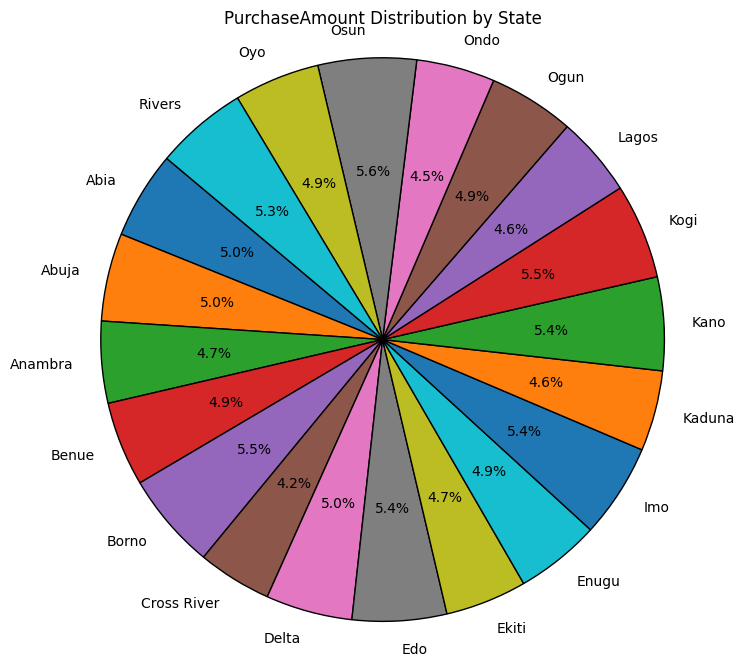

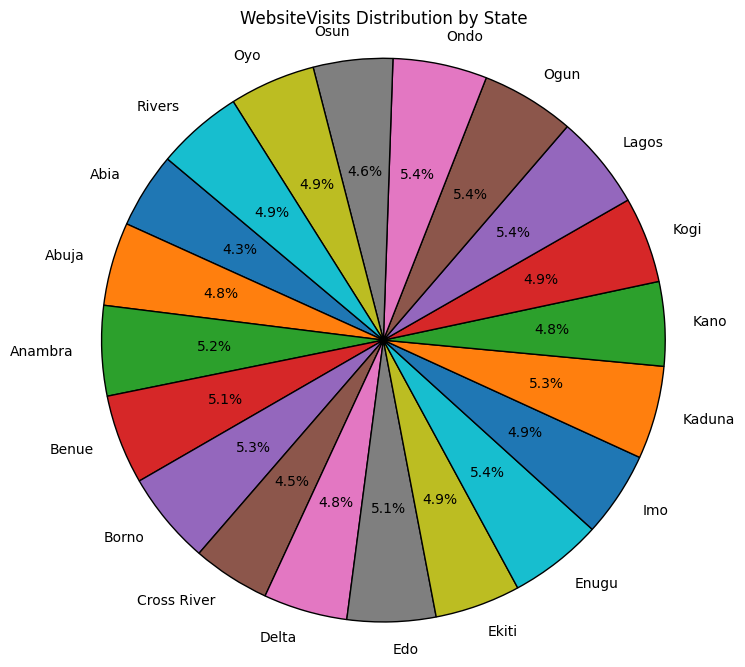

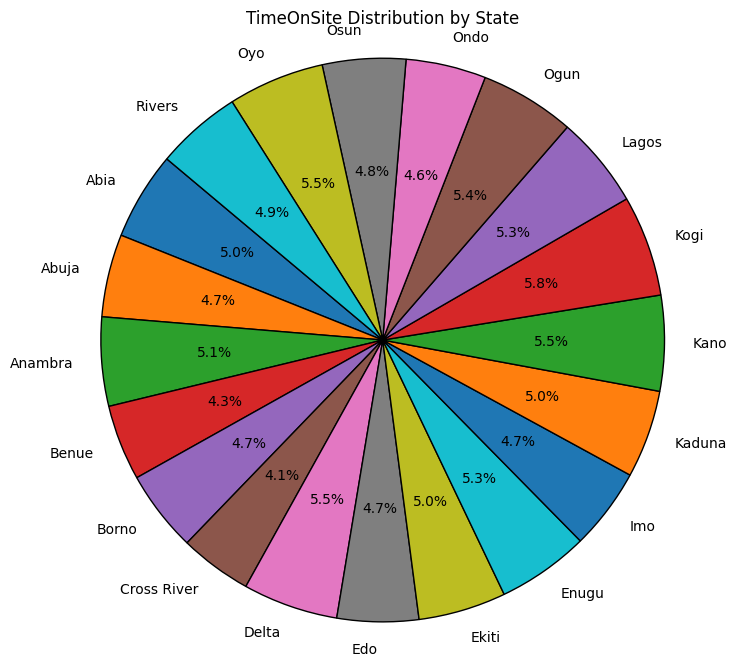

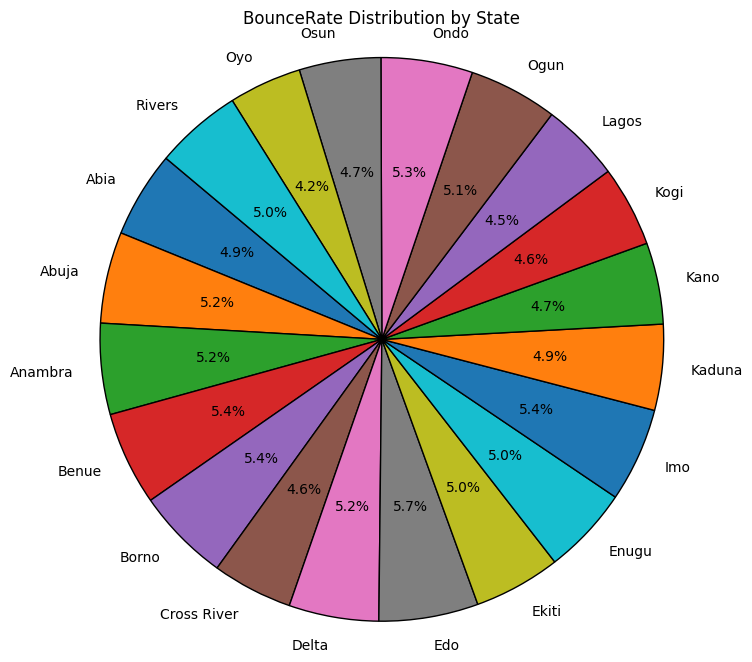

In [14]:

# Plot pie charts for each metric
for metric in metrics:
    plt.figure(figsize=(8, 8))
    plt.pie(
        state_data[metric], 
        labels=state_data['State'], 
        autopct='%1.1f%%', 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'{metric} Distribution by State')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
    plt.show()